In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.ticker

%matplotlib inline

In [2]:
df = pd.read_csv("/Users/matt/Desktop/MercedesRegression/merc.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


In [4]:
df.engineSize.value_counts()  # 12 engines of size 0.0

2.1    4018
2.0    3739
1.5    1675
3.0    1355
1.6     843
1.3     716
4.0     197
2.2     124
2.9     120
1.8     113
2.3      73
5.5      44
4.7      24
3.5      19
6.2      13
3.2      13
0.0      12
5.0       6
2.7       5
6.0       2
1.7       2
3.7       2
5.4       1
2.5       1
4.3       1
1.4       1
Name: engineSize, dtype: int64

In [5]:
df.transmission.value_counts()  # everything seems to be normal

Semi-Auto    6848
Automatic    4825
Manual       1444
Other           2
Name: transmission, dtype: int64

In [6]:
df.year.value_counts()  # Get rid off 1970, 1999, 1997, 1998 to obtain better results

2019    4553
2017    2381
2016    1971
2018    1467
2015     991
2020     719
2014     491
2013     292
2012      57
2010      38
2011      38
2007      22
2009      17
2008      16
2004      13
2001      10
2005       9
2002       9
2006       8
2003       7
1998       4
2000       3
1970       1
1997       1
1999       1
Name: year, dtype: int64

In [7]:
df.mileage.value_counts()  # seems reasonable

1000     324
16        62
3999      61
2000      59
9         45
        ... 
36587      1
1770       1
5864       1
12007      1
30701      1
Name: mileage, Length: 9716, dtype: int64

In [8]:
df.fuelType.value_counts()  # good

Diesel    9187
Petrol    3752
Hybrid     173
Other        7
Name: fuelType, dtype: int64

In [9]:
df.tax.value_counts()  # good, car tax can be equal to 0

145    7645
20     1251
125    1013
30      989
150     855
200     276
160     188
0       172
260     123
300      99
165      65
325      64
205      63
235      52
135      48
305      38
265      36
555      28
570      25
330      18
240      15
140      14
565       8
580       4
190       3
115       3
540       3
270       3
255       2
290       2
250       2
315       2
10        2
230       2
195       1
280       1
520       1
185       1
220       1
210       1
Name: tax, dtype: int64

In [10]:
df.mpg.value_counts()  # good

56.5    1028
64.2     877
65.7     692
67.3     622
68.9     611
        ... 
17.8       1
22.3       1
40.0       1
28.3       1
19.0       1
Name: mpg, Length: 120, dtype: int64

In [12]:
def preprocess_mercedes(data):
    """
    This function erases data points which I have found invalid during visual
    and numerical data analysis.
    """
    invalid_sizes = data[data["engineSize"] == 0.0].index
    for index in invalid_sizes:
        data = data.drop(index, axis=0)

    old_years = data[data["year"] < 2000].index
    for index in old_years:
        data = data.drop(index, axis=0)

    invalid_combustion = data[data["mpg"] < 10].index
    for index in invalid_combustion:
        data = data.drop(index, axis=0)

    data = data.reset_index(drop=True)

    return data

In [16]:
df = preprocess_mercedes(df)
y = df['price'].values

In [17]:
def visualise():
    """
    Function which visualize relationships between attributes and a price.

    """
    sns.boxplot(y='price', x='model', data=df)
    plt.show()

    plt.scatter(df['year'].values, y)  # Exponential behaviour
    plt.title("Price/Year relationship")
    plt.ylabel("Price [£]")
    plt.xlabel("Year")
    locator = matplotlib.ticker.MultipleLocator(2)
    plt.gca().xaxis.set_major_locator(locator)
    formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
    plt.gca().xaxis.set_major_formatter(formatter)
    plt.show()

    plt.scatter(df["mileage"], y)  # Decreasing exponential behaviour with one strange data point
    plt.title("Price/Mileage relationship")
    plt.ylabel("Price [£]")
    plt.xlabel("Mileage [miles]")
    plt.show()

    plt.scatter(df['mpg'].values, y)  # Kind off decreasing exponential but not to accurate scatter
    plt.title("Price/Combustion relationship")
    plt.ylabel("Price [£]")
    plt.xlabel("Combustion [miles per gallon]")
    plt.show()

    sns.boxplot(y='price', x='engineSize', data=df)
    plt.show()

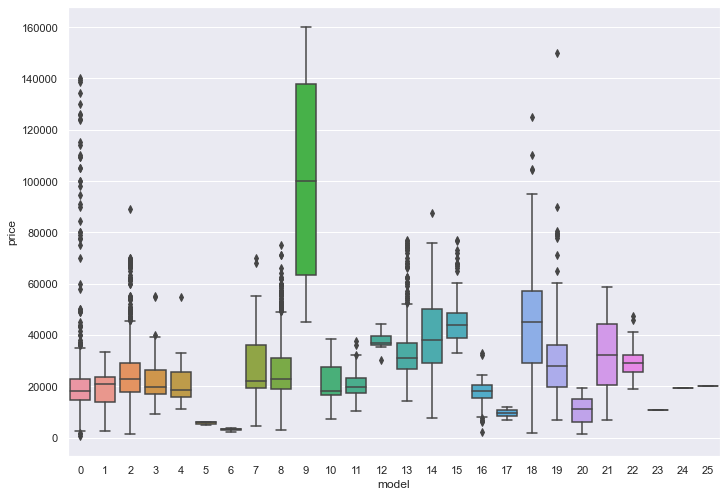

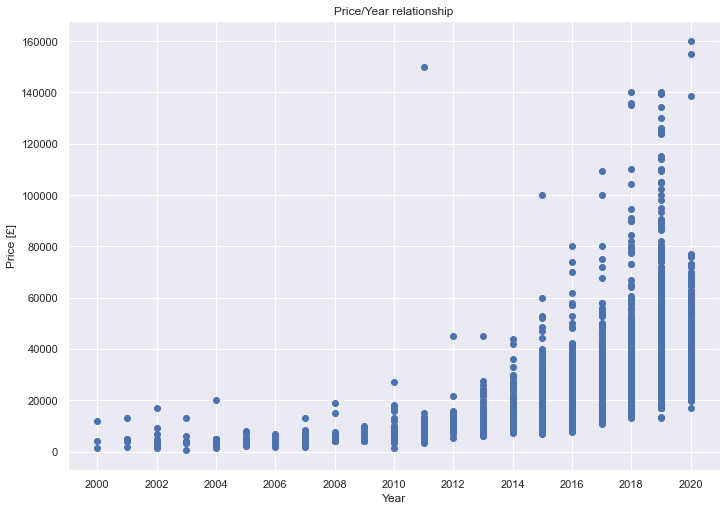

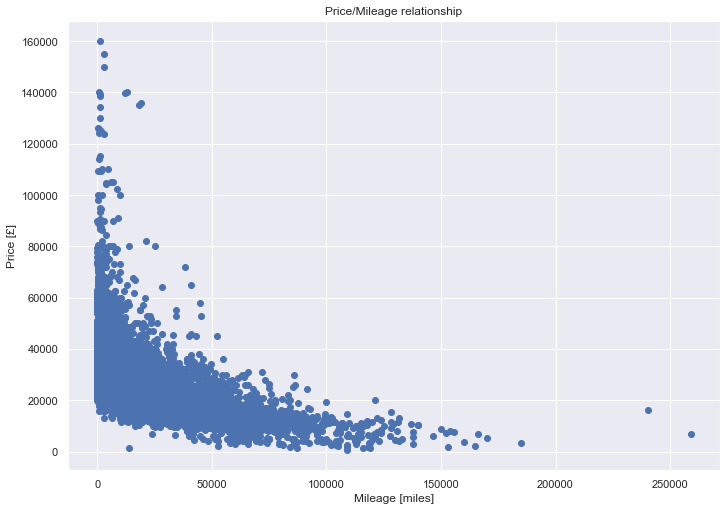

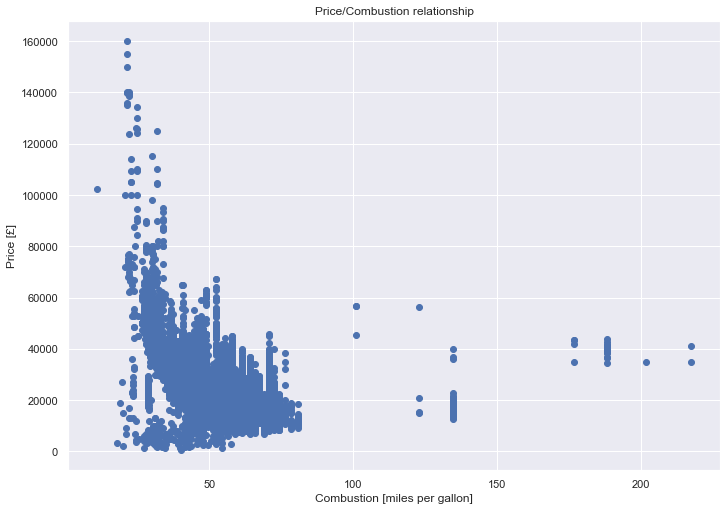

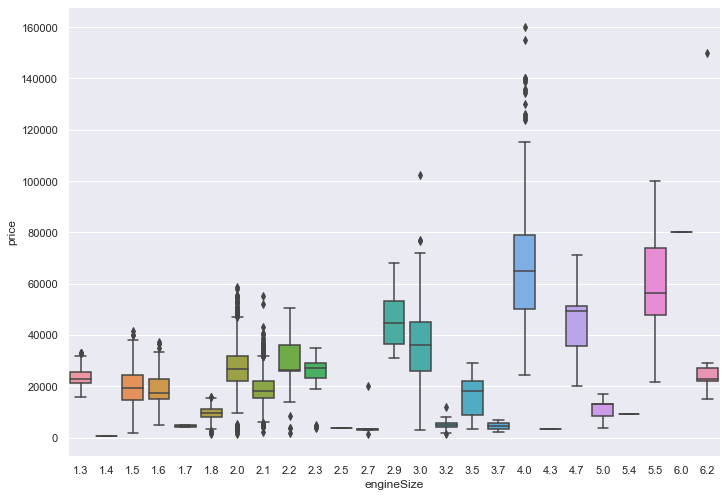

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
visualise()

In [19]:
le = LabelEncoder() # Using LabelEncoder to transform string attributes to integers
transmission_le = le.fit_transform(df["transmission"].values)
df["transmission"] = transmission_le
fuel_le = le.fit_transform(df["fuelType"].values)
df["fuelType"] = fuel_le
model_le = le.fit_transform(df["model"].values)
df["model"] = model_le

In [20]:
corr_matrix = []
for i in range(9):
    r = np.corrcoef(df.iloc[:, i], y)
    corr_matrix.append(r[0, 1])

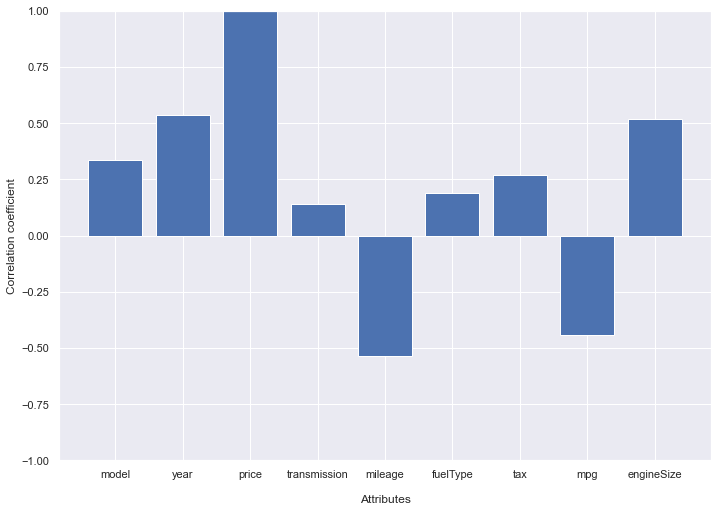

In [23]:
cols = [col for col in df]

plt.bar(cols, corr_matrix)
plt.ylabel("Correlation coefficient")
plt.ylim(top=1)
plt.ylim(bottom=-1)
plt.xlabel("Attributes", labelpad=15)
plt.show()

In [129]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [154]:
x_train, x_test, y_train, y_test = train_test_split(df[['year', 'mileage', 'mpg', 'model',
                                                         'engineSize']], y, test_size=0.2, random_state=10)

In [155]:
x_train

,year,mileage,mpg,model,engineSize
12911,2019,13155,46.3,2,1.5
11251,2016,52819,67.3,3,2.1
9891,2017,22000,65.7,2,2.1
12534,2017,22142,72.4,8,2.0
3895,2020,400,36.7,19,2.0
...,...,...,...,...,...
11633,2017,19425,68.9,0,2.1
1344,2016,22433,74.3,0,1.5
12815,2016,19292,64.2,2,2.1
7293,2019,13044,61.4,2,2.0


In [156]:
mms = MinMaxScaler()
x_scaled_train = mms.fit_transform(x_train)
x_scaled_test = mms.transform(x_test)

In [157]:
reg = LinearRegression()
reg.fit(x_scaled_train, y_train)
lasso = Lasso()
lasso.fit(x_scaled_train, y_train)
ridge = Ridge()
ridge.fit(x_scaled_train, y_train)

Ridge()

In [158]:
print(reg.score(x_scaled_train, y_train))
print(lasso.score(x_scaled_train, y_train))
print(ridge.score(x_scaled_train, y_train))

0.7097287312883456
0.7097264657333495
0.7096947021817273


In [159]:
print(reg.score(x_scaled_test, y_test))
print(lasso.score(x_scaled_test, y_test))
print(ridge.score(x_scaled_test, y_test))

0.6924273922052044
0.6923405552084689
0.6919997025702104
